Предварительный обзор данных из следующих источников (обновляется):

- реформаЖКХ
- данные исследования с хабра (основаны на данных реформаЖКХ) (1М записей)
- mos.ru

### РеформаЖКХ:

Много данных, указана этажность, но нет геоинформации. Каждая строка имеет идентификатор - `GUID`.

In [1]:
import pandas as pd
import time

In [2]:
a = "id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,built_year,exploitation_start_year,project_type,house_type,floor_count_max,floor_count_min,area_land"
dfcols = a.split(sep=',')
del(a)
df = pd.read_csv('../data/rosreestr/export-reestrmkd-77-1.csv', usecols=dfcols)

In [5]:
df.dtypes

id                           int64
region_id                   object
area_id                     object
city_id                     object
street_id                   object
shortname_region            object
formalname_region           object
shortname_area              object
formalname_area             object
shortname_city              object
formalname_city             object
shortname_street            object
formalname_street           object
house_number                object
building                    object
block                       object
letter                      object
address                     object
houseguid                   object
built_year                 float64
exploitation_start_year    float64
project_type                object
house_type                  object
floor_count_max              int64
floor_count_min            float64
area_land                   object
dtype: object

In [7]:
df.head(5)

,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,...,letter,address,houseguid,built_year,exploitation_start_year,project_type,house_type,floor_count_max,floor_count_min,area_land
0,8649748,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,"г. Москва, д. 9, к. 1",521474b9-1d5a-702f-3b75-33ff10263733,1973.0,1973.0,П-49-04/70Д,Многоквартирный дом,9,9.0,"0,00"
1,8963246,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,"г. Москва, д. 42, к. 2",4b9cbbad-b371-6ce1-bebe-09e785d0b894,1985.0,1985.0,П-44,Многоквартирный дом,17,17.0,"2561,70"
2,8932138,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,"г. Москва, д. 2301",c6307da6-86f4-e8ca-50f9-b7a812a258f9,NaN,2014.0,индивидуальный,Многоквартирный дом,13,NaN,NaN
3,8932139,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,"г. Москва, д. 2302",460591fb-89e3-230c-1691-7478c03eeb36,2013.0,2014.0,индивидуальный,Многоквартирный дом,11,9.0,NaN
4,8932140,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,"г. Москва, д. 2303",29caab54-2b6d-3f68-965f-a2fa837d086b,NaN,2014.0,индивидуальный,Многоквартирный дом,13,NaN,NaN


In [68]:
# uppercase GUID for merge simplicity
df.houseguid = df.houseguid.str.upper()
print('dataset length', len(df), 'empty GUIDs', len(df[df.houseguid =='']), sep='\n')
# fill NaN floor count
df['floor_count_max'].fillna(0, inplace=True)
df['floor_count_max'] = df['floor_count_max'].astype(int)
df['floor_count_min'].fillna(0, inplace=True)
df['floor_count_min'] = df['floor_count_min'].astype(int)
print('zero floor_count_max',len(df[df.floor_count_max == 0]), 'zero floor_count_min', len(df[df.floor_count_min == 0]), sep='\n')

dataset length
33994
empty GUIDs
0
zero floor_count_max
371
zero floor_count_min
3255


In [14]:
# want to see skyscrapers?
df[['id', 'floor_count_max', 'shortname_street', 'formalname_street', 'house_number', 'house_type', 'project_type']].sort_values('floor_count_max', ascending=False)

,id,floor_count_max,shortname_street,formalname_street,house_number,house_type,project_type
16824,8970507,58,пр-кт,Мира,188 Б,Многоквартирный дом,Индивидуальный
16825,9342445,58,пр-кт,Мира,188Б,Многоквартирный дом,индивидуальный проект
31316,7550747,57,пер,Чапаевский,3,Многоквартирный дом,Индивидуальный
17729,8051167,53,ул,Мосфильмовская,8,Многоквартирный дом,Индивидуальный
17770,7550760,50,ул,Мосфильмовская,70,Многоквартирный дом,Индивидуальный
384,7550751,49,ул,Авиационная,79,Многоквартирный дом,Индивидуальный
15699,7661778,48,пр-кт,Маршала Жукова,78,Многоквартирный дом,индивидуальный
14440,8979953,48,пр-кт,Ленинский,111,Многоквартирный дом,многофункциональный высотный жилой комплекс
19160,9358000,47,ул,Новодмитровская,2,Многоквартирный дом,Иной
19161,9358001,47,ул,Новодмитровская,2,Многоквартирный дом,Иное


In [46]:
# let's see horizons, each by each
height_groups = df.groupby('floor_count_max').size()

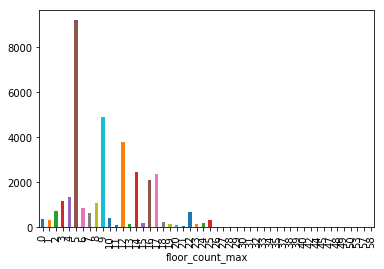

In [54]:
height_groups.plot(kind='bar')

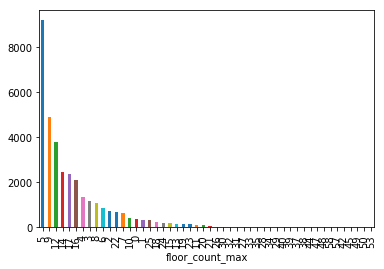

In [58]:
# sort floors by frequency
height_groups.sort_values(ascending=False).plot(kind='bar')

In [59]:
df.to_csv('../data/rosreestr/export-reestrmkd-77-min.csv', encoding='utf-8')

### 1М подвыборка с хабры:

Эти данные, скорее всего, результат парсинга страницы каждого дома - в них есть гео-информация. Источник данных: РеформаЖКХ, выборка в один миллион строк (по всей России). Увы, данные об этажности приблизительные.

In [61]:
df2 = pd.read_csv('../data/habr/data.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
df2.dtypes

latitude       float64
longitude      float64
year           float64
floors          object
appartments    float64
parking         object
repair          object
energy          object
dtype: object

In [63]:
floor_heights = df2.groupby('floors').size()

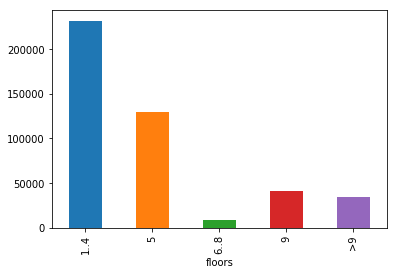

In [65]:
# as we see, floors are in bounds rather than exact
floor_heights.plot(kind='bar')

### Данные data.mos.ru:

Много данных, присутствует гео-информация, однако нет показателей этажности. Некоторые строки имеют `N_FIAS` - по сути тот же идентификатор, что и `GUID` в первом датасете.

In [69]:
# кодировка исходника cp1251, код ниже переводит в utf-8
# причина - на чтении cp1251-файла падает pandas.DataFrame.read_json
# TODO: переписать пути через os.
def encoder():
    for i in range(1,7):
        with open('../data/data-mos/data-29580-2019-01-20-'+str(i)+'.json', 'r', encoding='cp1251') as fc:
            with open('../data/data-mos/data-29580-2019-01-20-'+str(i)+'-utf8.json', 'w+', encoding='utf-8') as fu:
                fu.write(fc.read())

In [ ]:
dcols3 = 'UNOM,ADDRESS,ADM_AREA,DISTRICT,NREG,N_FIAS,geoData'.split(sep=',')

In [ ]:
df3 = pd.DataFrame()
t0 = time.time()
for i in range(1,7):
    with open('./data/data-mos/data-29580-2019-01-20-'+str(i)+'-utf8.json', 'r', encoding='utf-8') as f:
        dft = pd.read_json(f, encoding='utf-8')
        df3 = pd.concat([df3, dft])
        print(len(df3))
        # del(dft)
t1 = time.time()
print(t1-t0)

In [ ]:
df3.dtypes

In [ ]:
df3.N_FIAS = df3.N_FIAS.str.upper()

Число записей с непустыми геоданными:

In [ ]:
# df3.geoData.isna().sum()
df3.geoData.agg(pd.notna).sum()

### Склеивание данных РеформаЖКХ и data.mos.ru по `GUID`=`N_FIAS`

In [ ]:
d = df3.merge(df, how='inner', right_on='houseguid', left_on='N_FIAS')

In [ ]:
d.columns

In [ ]:
res0 = d[['floor_count_max', 'geoData', 'floor_count_min', 'ADDRESS', 'built_year', 'exploitation_start_year', 'project_type', 'house_type', 'area_land']]

In [ ]:
res0.to_csv('res0.csv', encoding='utf-8')

### P.S. Данные OSM XML в области, окаймляющей МКАД

In [5]:
import xml.etree.ElementTree as ET

In [6]:
tree = ET.parse('./map')
root = tree.getroot()

Здания в XML существуют в виде `nodes` - точек на карте и в виде `relations` - геометрических отношений, обозначающих их контур. Простых "точек" в сете не более 1.5 тысяч:

In [44]:
# be effective is my hobby
b = 0
l = 0
h = 0
n = 0
t0 = time.time()
for node in root.iter('node'):
    for tag in node.iter('tag'):
        if 'building' in tag.attrib['k']:
            b = b + 1
            if 'levels' in tag.attrib['k']:
                l = l + 1
            if 'height' in tag.attrib['k']:
                h = h + 1
    n = n + 1
t1 = time.time()
print('timed', str(t1-t0), 'sec')
print('all', str(n))
print('buildings', str(b))
print('with levels', str(l))
print('with heights', str(h))

timed 41.33345079421997 sec
all 3206997
buildings 1146
with levels 349
with heights 0


In [77]:
t = True
t0=time.time()
table = []

for r in root.iter('relation'):
    
    for tag in r.iter('tag'):
        if tag.attrib['k'] == 'building':
            table.append(r)
            pass
    
t1=time.time()

In [51]:
#tag "building" count
b = 156111
#tag "building:levels" count
l = 84877

84877


In [ ]:
table = []
line = dict{'lat', 'lon', 'levels', 'height', 'street', ''}
for tag in root.iter('tag'):
    if tag.attrib['k'] == 'building':
        